In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import nltk
import nltk.corpus

In [2]:
tweet_data=pd.read_csv(r"D:\data science\train.csv")
tweet_data.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [3]:
tweet_data=tweet_data.drop(['keyword','location'],axis=1)
tweet_data.head()

,id,text,target
0,1,Our Deeds are the Reason of this #earthquake M...,1
1,4,Forest fire near La Ronge Sask. Canada,1
2,5,All residents asked to 'shelter in place' are ...,1
3,6,"13,000 people receive #wildfires evacuation or...",1
4,7,Just got sent this photo from Ruby #Alaska as ...,1


In [4]:
tweet_data['text'][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [5]:
test_data=pd.read_csv(r"D:\data science\test.csv")
test_data.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [6]:
test_data=test_data.drop(['keyword','location'],axis=1)
test_data.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
data1=pd.DataFrame(tweet_data.text,columns=['text'])
data2=pd.DataFrame(test_data.text,columns=['text'])
data=pd.concat([data1,data2],axis=0,ignore_index=True)

In [10]:
import re
import string

def remove_url(text):
    url=re.compile(r'http?://\S+|www\.\S+')
    return url.sub(r'',text)
def remove_html(text):
    html=re.compile(r'<.*?>|&([a-z0-9]+|#[0-9]{1,6}#x[0-9a-f]{1,6});')
    return re.sub(html,'',text)


data['text']=data['text'].apply(lambda x: remove_url(x))
data['text']=data['text'].apply(lambda x: remove_html(x))

In [11]:
for i in range(len(data)):
    data['text'][i].lower()

In [12]:
from nltk.corpus import stopwords
stop_words=set(stopwords.words("english"))
print(stopwords.words('english'))
stop_wrds=np.array(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
import gensim 
data["tokenized_text"]=data["text"].apply(gensim.utils.simple_preprocess)
data.head()

,text,tokenized_text
0,Our Deeds are the Reason of this #earthquake M...,"[our, deeds, are, the, reason, of, this, earth..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala..."


In [15]:
def remove_stp(txt_tokenized):
    txt_clean=[word for word in txt_tokenized if word not in stop_words]
    return txt_clean
data['clean_tokenized_text']=data['tokenized_text'].apply(lambda x: remove_stp(x))
data.head()

,text,tokenized_text,clean_tokenized_text
0,Our Deeds are the Reason of this #earthquake M...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv..."
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]"
2,All residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o..."
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order..."
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi..."


In [17]:
def conc(txt_tokenized):
    s=" "
    tmp=s.join(txt_tokenized)
    return tmp
data['clean_text']=data['clean_tokenized_text'].apply(lambda x: conc(x))
data.head()

,text,tokenized_text,clean_tokenized_text,clean_text
0,Our Deeds are the Reason of this #earthquake M...,"[our, deeds, are, the, reason, of, this, earth...","[deeds, reason, earthquake, may, allah, forgiv...",deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,"[forest, fire, near, la, ronge, sask, canada]","[forest, fire, near, la, ronge, sask, canada]",forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,"[all, residents, asked, to, shelter, in, place...","[residents, asked, shelter, place, notified, o...",residents asked shelter place notified officer...
3,"13,000 people receive #wildfires evacuation or...","[people, receive, wildfires, evacuation, order...","[people, receive, wildfires, evacuation, order...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,"[just, got, sent, this, photo, from, ruby, ala...","[got, sent, photo, ruby, alaska, smoke, wildfi...",got sent photo ruby alaska smoke wildfires pou...


In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(ngram_range=(1,2))
vector=cv.fit_transform(data["clean_text"])

In [20]:
X=vector[:len(tweet_data)]
y=tweet_data.target
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.9)

In [27]:
model = MultinomialNB()
model.fit(X_train, y_train)
pred=model.predict(X_test)

In [28]:
accuracy_score(pred,y_test)

0.800524934383202

In [29]:
test_vector=vector[len(tweet_data):]

# ANOTHER VARIATION USING NEURAL NETWORKS(LSTM)

In [3]:
import re
import string 
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import pandas as pd

In [4]:
train=pd.read_csv(r"C:\Users\sajal\OneDrive\Desktop\competition\train (1).csv")
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
def make_lower(text):
    return text.lower()

In [6]:
def remove_urls(text):
    url = r'https?://\S+|www\.\S+' #regex for urls beginning with http or https, and those beginning with www.
    return re.sub(url, '', text) #We will replace matched urls with the empty string to remove them

In [7]:
def remove_html(text):
    html = r'<.*?>'
    return re.sub(html, '', text)
def remove_mentions(text):
    mention = "@[A-Za-z0-9_]+"
    return re.sub(mention,"", text)
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table) 
def remove_stopwords(text):
    new_text = []
    for word in text.split():
        if word in stopwords.words('english'):
            new_text.append('')
        else:
            new_text.append(word) 
    return ' '.join(new_text)

#Here we are creating a new text. Whenever we encounter a word in our text that is a stopword, we don't add it to our new text. If the word is not a stopword, we
#add it to our new text.

In [8]:
porter = PorterStemmer()
def do_stemming(text):
    new_text = [
        porter.stem(word) for word in text.split()
    ]
    return ' '.join(new_text)

# We go over each word in our text and do stemmatization, and then add it to our new text

In [9]:
train['text'] = train['text'].apply(lambda text: make_lower(text))
train['text'] = train['text'].apply(lambda text: remove_urls(text))
train['text'] = train['text'].apply(lambda text: remove_html(text))
train['text'] = train['text'].apply(lambda text: remove_mentions(text))
train['text'] = train['text'].apply(lambda text: remove_punct(text))
train['text'] = train['text'].apply(lambda text: remove_stopwords(text))
train['text'] = train['text'].apply(lambda text: do_stemming(text))

In [10]:
train.head()

,id,keyword,location,text,target
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1
1,4,NaN,NaN,forest fire near la rong sask canada,1
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1
3,6,NaN,NaN,13000 peopl receiv wildfir evacu order california,1
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1


In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000) #We are going with a max 5000-dimensional feature space

In [12]:
tfidf_vectorized_text_df = pd.DataFrame(tfidf_vectorizer.fit_transform(train['text']).toarray())

In [13]:
train_tfidf = pd.concat([train, tfidf_vectorized_text_df], axis=1) 
train_tfidf.head() 

,id,keyword,location,text,target,0,1,2,3,4,...,4990,4991,4992,4993,4994,4995,4996,4997,4998,4999
0,1,NaN,NaN,deed reason earthquak may allah forgiv us,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4,NaN,NaN,forest fire near la rong sask canada,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,5,NaN,NaN,resid ask shelter place notifi offic evacu she...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,NaN,NaN,13000 peopl receiv wildfir evacu order california,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,7,NaN,NaN,got sent photo rubi alaska smoke wildfir pour ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
train_tfidf.drop('text', axis=1, inplace=True)

In [15]:
train_tfidf['keyword'].value_counts().to_frame().reset_index().head().rename(columns={'index':'Keyword', 'keyword':'Frequency'})

,Keyword,Frequency
0,fatalities,45
1,armageddon,42
2,deluge,42
3,body%20bags,41
4,sinking,41


In [16]:
train.groupby('keyword')['target'].mean().to_frame().reset_index().sort_values(by=['target'], ascending=[False]).head(10).rename(columns={'keyword':'Keyword', 'target':'Target Proportion'})

,Keyword,Target Proportion
62,debris,1.000000
219,wreckage,1.000000
70,derailment,1.000000
153,outbreak,0.975000
152,oil%20spill,0.973684
205,typhoon,0.973684
187,suicide%20bombing,0.969697
186,suicide%20bomber,0.967742
32,bombing,0.931034
166,rescuers,0.914286


In [17]:
keywords_with_high_chance_of_disaster = train.groupby('keyword')['target'].mean().to_frame().reset_index().sort_values(by=['target'], ascending=[False])[:25]['keyword'].tolist()

train_tfidf['keyword'].fillna('n', inplace=True)

train_tfidf['keyword_high_chance'] = train_tfidf['keyword'].apply(lambda keyword: 1 if keyword in keywords_with_high_chance_of_disaster else 0)

train_tfidf.drop('keyword', axis=1, inplace=True)

train_tfidf.head()

,id,location,target,0,1,2,3,4,5,6,...,4991,4992,4993,4994,4995,4996,4997,4998,4999,keyword_high_chance
0,1,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,4,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,6,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,7,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [18]:
train_tfidf['location'].value_counts().to_frame().reset_index().rename(columns={'index':'Location', 'location':'Frequency'}).head(10)

,Location,Frequency
0,USA,104
1,New York,71
2,United States,50
3,London,45
4,Canada,29
5,Nigeria,28
6,UK,27
7,"Los Angeles, CA",26
8,India,24
9,Mumbai,22


In [19]:
high_freq_locs = train_tfidf['location'].value_counts().to_frame().reset_index().rename(columns={'index':'Location', 'location':'Frequency'}).head(10)['Location'].tolist() 
high_freq_locs

['USA',
 'New York',
 'United States',
 'London',
 'Canada',
 'Nigeria',
 'UK',
 'Los Angeles, CA',
 'India',
 'Mumbai']

In [20]:
train_tfidf[train_tfidf['location'].isin(high_freq_locs)].groupby('location')['target'].mean().to_frame().reset_index().sort_values(by=['target'], ascending=[False])

,location,target
4,Mumbai,0.863636
1,India,0.833333
6,Nigeria,0.785714
8,USA,0.644231
7,UK,0.592593
9,United States,0.540000
0,Canada,0.448276
2,London,0.355556
3,"Los Angeles, CA",0.307692
5,New York,0.225352


In [21]:
train_tfidf['location_high_chance'] = train_tfidf['location'].apply(lambda location: 1 if location in ['Mumbai', 'India', 'Nigeria'] else 0)

train_tfidf.head()

,id,location,target,0,1,2,3,4,5,6,...,4992,4993,4994,4995,4996,4997,4998,4999,keyword_high_chance,location_high_chance
0,1,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
1,4,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
2,5,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,6,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0
4,7,NaN,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [22]:
train_tfidf.drop('id', axis=1, inplace=True)
train_tfidf.drop('location', axis=1, inplace=True)

In [23]:
train_tfidf['num_words'] = train['text'].apply(lambda text: len(text.split()))

<AxesSubplot:xlabel='num_words', ylabel='Density'>

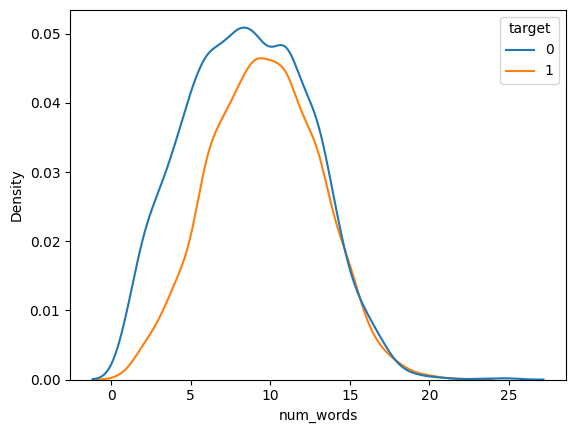

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns 

sns.kdeplot(data=train_tfidf, x='num_words', hue='target')

In [25]:
import warnings
warnings.filterwarnings('ignore')

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_tfidf.drop('target', axis=1), train_tfidf['target'], random_state=42)

X_train.shape, X_val.shape

((5709, 5003), (1904, 5003))

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [28]:
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train) 
y_pred = knn.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.78      1091
           1       0.71      0.65      0.68       813

    accuracy                           0.74      1904
   macro avg       0.73      0.73      0.73      1904
weighted avg       0.74      0.74      0.73      1904



In [29]:
train['text'] = train['text'].apply(lambda text: make_lower(text))
train['text'] = train['text'].apply(lambda text: remove_urls(text))
train['text'] = train['text'].apply(lambda text: remove_html(text))
train['text'] = train['text'].apply(lambda text: remove_mentions(text))
train['text'] = train['text'].apply(lambda text: remove_punct(text))
train['text'] = train['text'].apply(lambda text: do_stemming(text))

In [30]:
all_texts = train['text'].tolist()
all_targets = train['target'].tolist()

import random
random.Random(1337).shuffle(all_texts)
random.Random(1337).shuffle(all_targets)

In [31]:
all_texts[:3]

['civilian casualti afghanistan hit highest number sinc 2009 un say via',
 'keep sneez either someon place southern dust storm hou someon talkin smack',
 'im amaz inund mistress']

In [32]:
train_texts = all_texts[:4000]
train_targets = all_targets[:4000] 

val_texts = all_texts[4000:5500]
val_targets = all_targets[4000:5500]

test_texts = all_texts[5500:]
test_targets = all_targets[5500:]

In [33]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [34]:
max_vocab_size = 10000
tokenizer = Tokenizer(num_words = max_vocab_size)
tokenizer.fit_on_texts(train_texts)
int_train_texts = tokenizer.texts_to_sequences(train_texts)

In [35]:
int_train_texts[:1]

[[697, 157, 1052, 174, 1895, 639, 242, 1896, 1169, 29, 7]]

In [36]:
int_val_texts = tokenizer.texts_to_sequences(val_texts)
int_test_texts = tokenizer.texts_to_sequences(test_texts)

In [37]:
int_train_texts = pad_sequences(int_train_texts, maxlen=30)
int_val_texts = pad_sequences(int_val_texts, maxlen=30)
int_test_texts = pad_sequences(int_test_texts, maxlen=30)

In [38]:
int_train_texts.shape

(4000, 30)

In [40]:
import numpy as np

In [41]:
train_targets = np.array(train_targets)
val_targets = np.array(val_targets)
test_targets = np.array(test_targets)

In [42]:
pip install wget

Note: you may need to restart the kernel to use updated packages.


In [45]:
!wget https://huggingface.co/stanfordnlp/glove/resolve/main/glove.twitter.27B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
